Nuha BinTayyash, 2020

This notebook shows the ROC and precision-recall curves resulted from running GPcounts with one sample test on simulated bulk RNA-seq datasets.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
from scipy import stats

In [2]:
DESeq2 = pd.read_csv('fission_DESeq2_tst_scaled.csv',index_col=[0])
print(DESeq2.shape)
GPcounts_NB = pd.read_csv('ll_Negative_binomial_fission_normalized_counts_scaled.csv',index_col=[0])
GPcounts_G = pd.read_csv('ll_Gaussian_fission_normalized_counts_scaled.csv',index_col=[0])
print(GPcounts_NB.shape)
print(GPcounts_G.shape)

(6459, 6)
(6459, 4)
(6459, 4)


In [3]:
DESeq_sorted = DESeq2.sort_values(by=['pvalue'])
DESeq_sorted


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
SPNCRNA.1144,1.217305,8.521276,2.715801,9.341284e+00,0.002240,1
SPCC417.06c,1.412600,-5.961226,2.005189,8.669340e+00,0.003236,1
SPNCRNA.488,5.104772,-3.670428,1.277721,8.477169e+00,0.003596,1
SPAC1A6.08c,28.279930,1.553550,0.530327,8.324654e+00,0.003911,1
SPNCRNA.1387,1.468483,-5.613072,2.101783,8.097483e+00,0.004433,1
...,...,...,...,...,...,...
SPBC31F10.15c,441.505530,-0.000098,0.241508,1.484479e-07,0.999693,1
SPAC139.06,354.301526,-0.000020,0.248570,4.083859e-09,0.999949,1
SPNCRNA.1326,3.825882,-0.061994,3.192256,-4.851704e-04,1.000000,1
SPAC513.04,1.076923,-0.820488,3.293259,-2.406579e-02,1.000000,1


In [4]:
GPcounts_NB_sorted = GPcounts_NB.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_NB_sorted

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio
SPBC887.07,-176.241607,-91.792554,401.962773,486.411826
SPAP27G11.13c,-281.553889,-126.768951,-125.212195,29.572743
SPAC186.05c,-207.496334,-88.502830,-89.823481,29.170023
SPAC6B12.15,-370.623882,-169.983755,-174.455807,26.184320
SPNCRNA.957,-98.578665,-32.831386,-46.080160,19.667119
...,...,...,...,...
SPBC660.07,-258.573091,-156.017383,-154.493770,-51.938062
SPAC11E3.14,-229.262369,-142.203697,-141.752274,-54.693601
SPCC1183.11,-262.033687,-158.642312,-158.257344,-54.865969
SPBC4B4.08,-298.187976,-177.095993,-178.714534,-57.622551


In [5]:
GPcounts_G_sorted = GPcounts_G.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_G
#_sorted

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio
SPAC212.11,-47.334333,-25.113966,-23.980782,-1.760415
SPAC212.09c,-22.766869,-15.445525,-10.978751,-3.657407
SPAC212.04c,-40.417536,-23.098746,-17.759030,-0.440240
SPAC212.01c,-35.607432,-14.571765,-20.806929,0.228739
SPNCRNA.601,-44.423336,-23.328781,-23.437866,-2.343310
...,...,...,...,...
SPMITTRNATYR.01,-11.099361,-5.295005,-9.052383,-3.248027
SPMITTRNAILE.02,-12.199629,-10.363152,-5.029947,-3.193469
SPMIT.10,4.924380,-0.238892,0.075958,-5.087313
SPMITTRNAGLU.01,-22.278091,-12.479395,-13.329905,-3.531210


0.1
0.29374700654568675


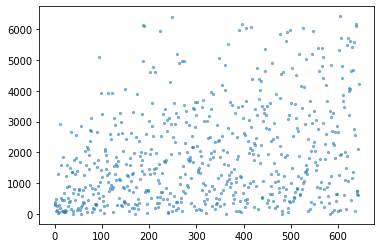

0.18500565038957947


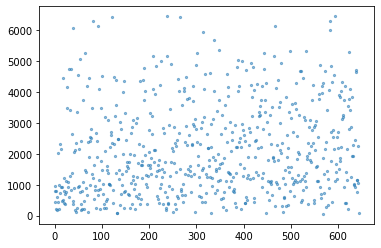

0.2
0.27982325173156947


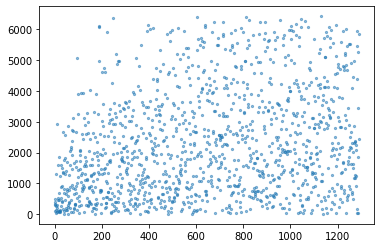

0.19599803666326673


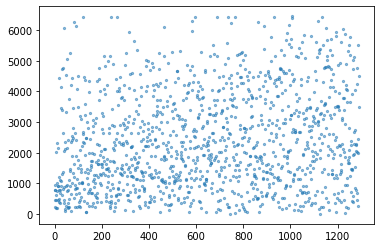

0.30000000000000004
0.29408241433574034


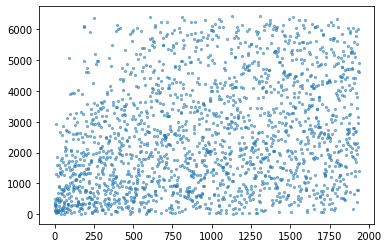

0.19863201728748758


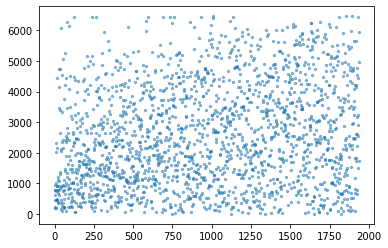

0.4
0.29054259895287643


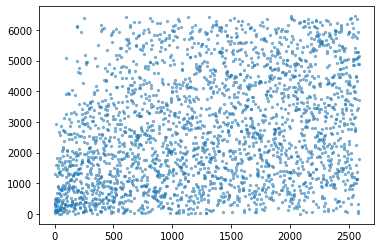

0.21094773416665644


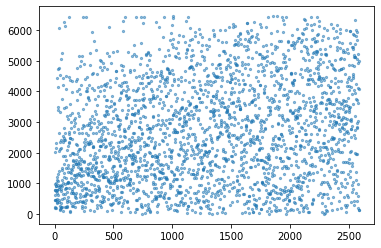

0.5
0.2710183597143612


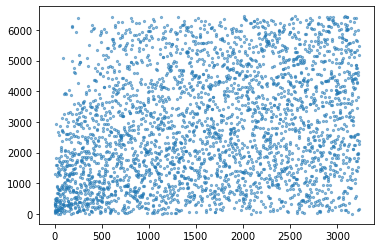

0.24402225310011788


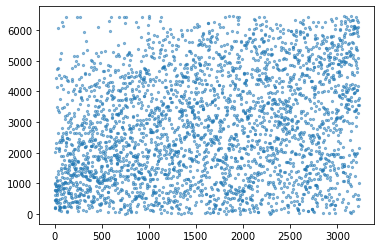

0.6000000000000001
0.2949848426781889


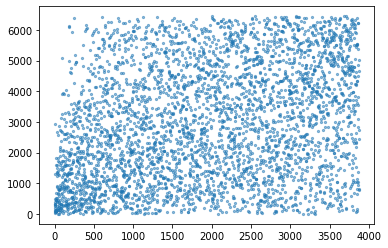

0.25481757576791886


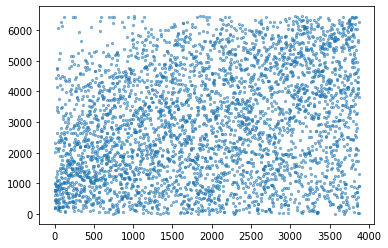

0.7000000000000001
0.28340926591586596


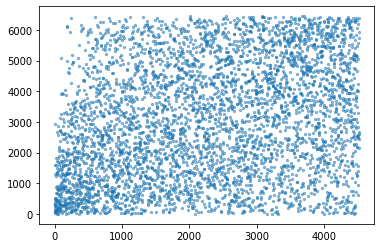

0.25274596830503876


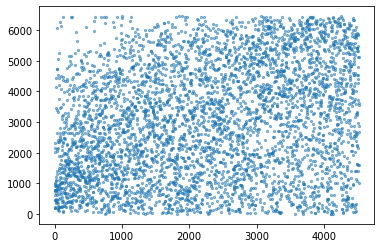

0.8
0.27270566845806254


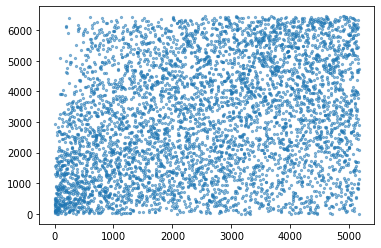

0.2524853485630373


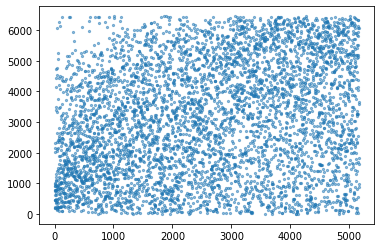

0.9
0.2760880594698668


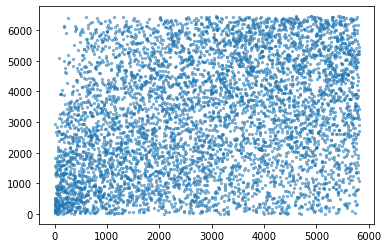

0.26613513865292165


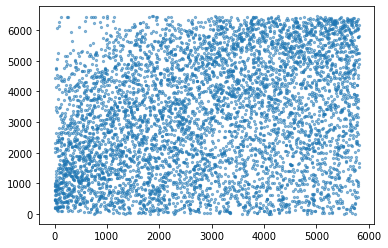

1.0
0.2585211368507864


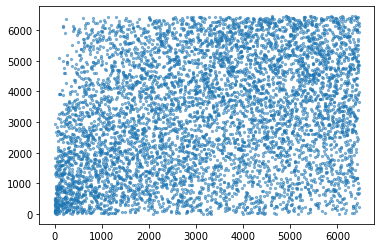

0.257313388288243


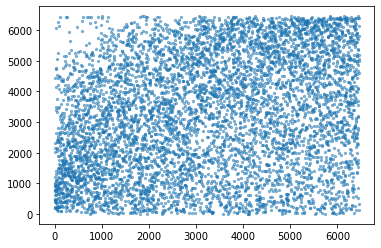

In [6]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
DESeq_id = list(DESeq_sorted.index.values)
GPcounts_NB_id = list(GPcounts_NB_sorted.index)
GPcounts_G_id = list(GPcounts_G_sorted.index)
corr_NB = []
corr_G = []

for count in range(10):
    print(percentage[count])
    DESeq_id_part= DESeq_id[int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])]
    GPcounts_NB_index_part = []
    GPcounts_G_index_part = []
    for i in DESeq_id_part:
        GPcounts_NB_index_part.append(GPcounts_NB_id.index(i))
        GPcounts_G_index_part.append(GPcounts_G_id.index(i))
    
    DESeq_index_part = list(range(0,len(DESeq_id_part)))
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_NB_index_part)
    print(rho)
    corr_NB.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_NB_index_part,s=5,alpha=0.5)
    plt.show() 
    
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_G_index_part)
    print(rho)
    corr_G.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_G_index_part,s=5,alpha=0.5)
    plt.show() 
   

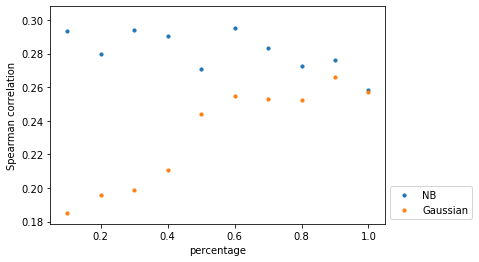

In [7]:
plt.scatter(percentage,corr_NB,s=10,label = 'NB')
plt.scatter(percentage,corr_G,s=10,label = 'Gaussian')
plt.xlabel('percentage')
plt.ylabel('Spearman correlation')
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1)

sort GPcounts results according to DESeq2 

In [8]:
GPcounts_NB_DESeq_sorted = GPcounts_NB.reindex(list(DESeq_sorted.index.values))
GPcounts_NB_DESeq_sorted 

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio
SPNCRNA.1144,-46.838541,-18.310911,-26.930489,1.597142
SPCC417.06c,-52.096217,-27.622742,-23.361360,1.112115
SPNCRNA.488,-96.884138,-45.829335,-49.393403,1.661400
SPAC1A6.08c,-142.971135,-70.439294,-71.753859,0.777981
SPNCRNA.1387,-55.048429,-25.431536,-25.753017,3.863877
...,...,...,...,...
SPBC31F10.15c,-210.168412,-109.148834,-105.628360,-4.608783
SPAC139.06,-200.469202,-106.234524,-102.107250,-7.872572
SPNCRNA.1326,-61.228290,-33.729938,-27.962250,-0.463898
SPAC513.04,-40.188267,-30.364343,-7.419112,2.404813


In [9]:
GPcounts_G_DESeq_sorted = GPcounts_G.reindex(list(DESeq_sorted.index.values))
GPcounts_G_DESeq_sorted

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio
SPNCRNA.1144,-38.215337,-13.703977,-21.140347,3.371012
SPCC417.06c,-36.284152,-20.201398,-16.049192,0.033562
SPNCRNA.488,-47.781368,-22.902778,-24.038713,0.839877
SPAC1A6.08c,-25.981253,-14.034159,-11.107024,0.840070
SPNCRNA.1387,-38.129288,-11.526547,-15.701424,10.901317
...,...,...,...,...
SPBC31F10.15c,16.824700,1.521699,3.630413,-11.672588
SPAC139.06,9.281716,-2.592903,2.606114,-9.268506
SPNCRNA.1326,-43.633812,-26.274460,-11.680004,5.679348
SPAC513.04,-38.269780,-24.015108,13.156620,27.411292


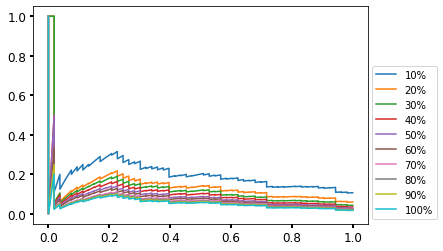

In [11]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
fig = plt.figure()
cmap = plt.cm.hot

dfs = [GPcounts_NB_DESeq_sorted['log_likelihood_ratio']]#,GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
for df in range(len(dfs)):
    for i in range(10):
        D =int(len(DESeq_id) * percentage[i])
        true_label = np.zeros(D)

        for j in range(D):
            if DESeq_sorted['pvalue'][j] <= 0.05 :
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values[0:D], columns =['label'])

        precision_NB, recall_NB, thresholds_NB = metrics.precision_recall_curve(labels['label'],dfs[df][0:D])
        plt.plot( recall_NB,precision_NB,label=str(int(percentage[i]*100))+'%')
        plt.tick_params(labelsize='large', width=2) 
        
        #plt.xlabel('recall')
        #plt.ylabel('precision')
        plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            title = 'GPcounts with NB likelihood'
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title)
        '''
    plt.show()
